In [1]:
import pandas as pd

data_path = "../DataPreProcessing/.out/license_plates.csv"
image_path = "../OCR/data/LP-characters/images"

data = pd.read_csv(data_path)

In [18]:
data.iloc[0]

plate          MH15TC554
filename        0000.xml
char0                  M
coord0       13-17-27-32
char1                  H
coord1       25-16-38-33
char2                  1
coord2       36-16-46-34
char3                  5
coord3       45-16-55-33
char4                  T
coord4       58-16-69-33
char5                  C
coord5       67-16-78-33
char6                  5
coord6       82-16-92-33
char7                  5
coord7      91-16-100-33
char8                  4
coord8      98-16-109-33
char9                NaN
coord9               NaN
char10               NaN
coord10              NaN
char11               NaN
coord11              NaN
char12               NaN
coord12              NaN
char13               NaN
coord13              NaN
char14               NaN
coord14              NaN
char15               NaN
coord15              NaN
char16               NaN
coord16              NaN
char17               NaN
coord17              NaN
char18               NaN
coord18              NaN


In [181]:
import PIL as pil
from PIL import Image
from skimage.feature import hog
import matplotlib.pyplot as plt
import cv2

def grab_bbs(row):
    img = cv2.imread(f"{image_path}/{row['filename'].split('.')[0]}.png", 0)

    bbs = []
    charcoords = row[2:]
    charcoords = charcoords[charcoords.notnull()]
    for i in range(0, len(charcoords), 2):
        char = charcoords[i]
        coords = charcoords[i+1]
        xmin, ymin, xmax, ymax = [int(x) for x in coords.split("-")]
        # crop image to bounding box
        char_img = img[ymin:ymax, xmin:xmax]

        # scale image
        char_img = cv2.resize(char_img, (64, 64))
        
        #plt.figure()
        hog_img = hog(char_img, orientations=9, pixels_per_cell=(4,4), cells_per_block=(1, 1))
        #plt.imshow(hog_img,cmap='gray')

        bbs.append((char, hog_img))

    return bbs

In [182]:
grab_bbs(data.iloc[5])

[('H',
  array([0.0698168 , 0.55291212, 0.55291212, ..., 0.        , 0.        ,
         0.        ])),
 ('R',
  array([0.39750583, 0.        , 0.5297764 , ..., 0.        , 0.        ,
         0.31085804])),
 ('6',
  array([0.        , 0.        , 0.        , ..., 0.47953199, 0.47953199,
         0.        ])),
 ('9',
  array([0.41750283, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ])),
 ('6',
  array([0.5       , 0.        , 0.        , ..., 0.35659201, 0.35659201,
         0.        ])),
 ('9',
  array([0.4472136, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ])),
 ('6',
  array([0.15892883, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ])),
 ('9',
  array([0.26411931, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]))]

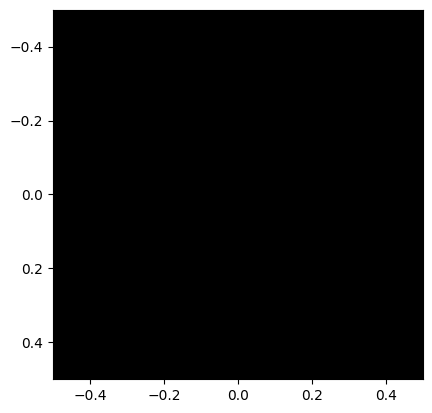

In [4]:
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog


im_test = cv2.imread('ocr_data/train/A/roi107644.jpg',0)
_,hog_img= hog(im_test,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1),visualize=True)
plt.imshow(hog_img,cmap='gray')